In [ ]:
import sys

sys.path.append("..")

In [ ]:
import matplotlib.pyplot as plt
from finrl.agents.stablebaselines3.models import DRLAgent

from config import config, config_indicators
from environments.env_portfolio_optimisation import PortfolioOptimisationEnv
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [ ]:
import os

if not os.path.exists("../" + config.MODELS_DIR):
    os.makedirs("../" + config.MODELS_DIR)

if not os.path.exists("../" + config.RESULTS_DIR):
    os.makedirs("../" + config.RESULTS_DIR)

if not os.path.exists("../" + config.LOGS_DIR):
    os.makedirs("../" + config.LOGS_DIR)

In [ ]:
# If train is False, load the model from the models directory
TRAIN = True

In [ ]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
train_data, trade_data = finpreprocessor.load_train_test_data(
    "../" + config.DATA_DIR, config.TEST_NAME
)

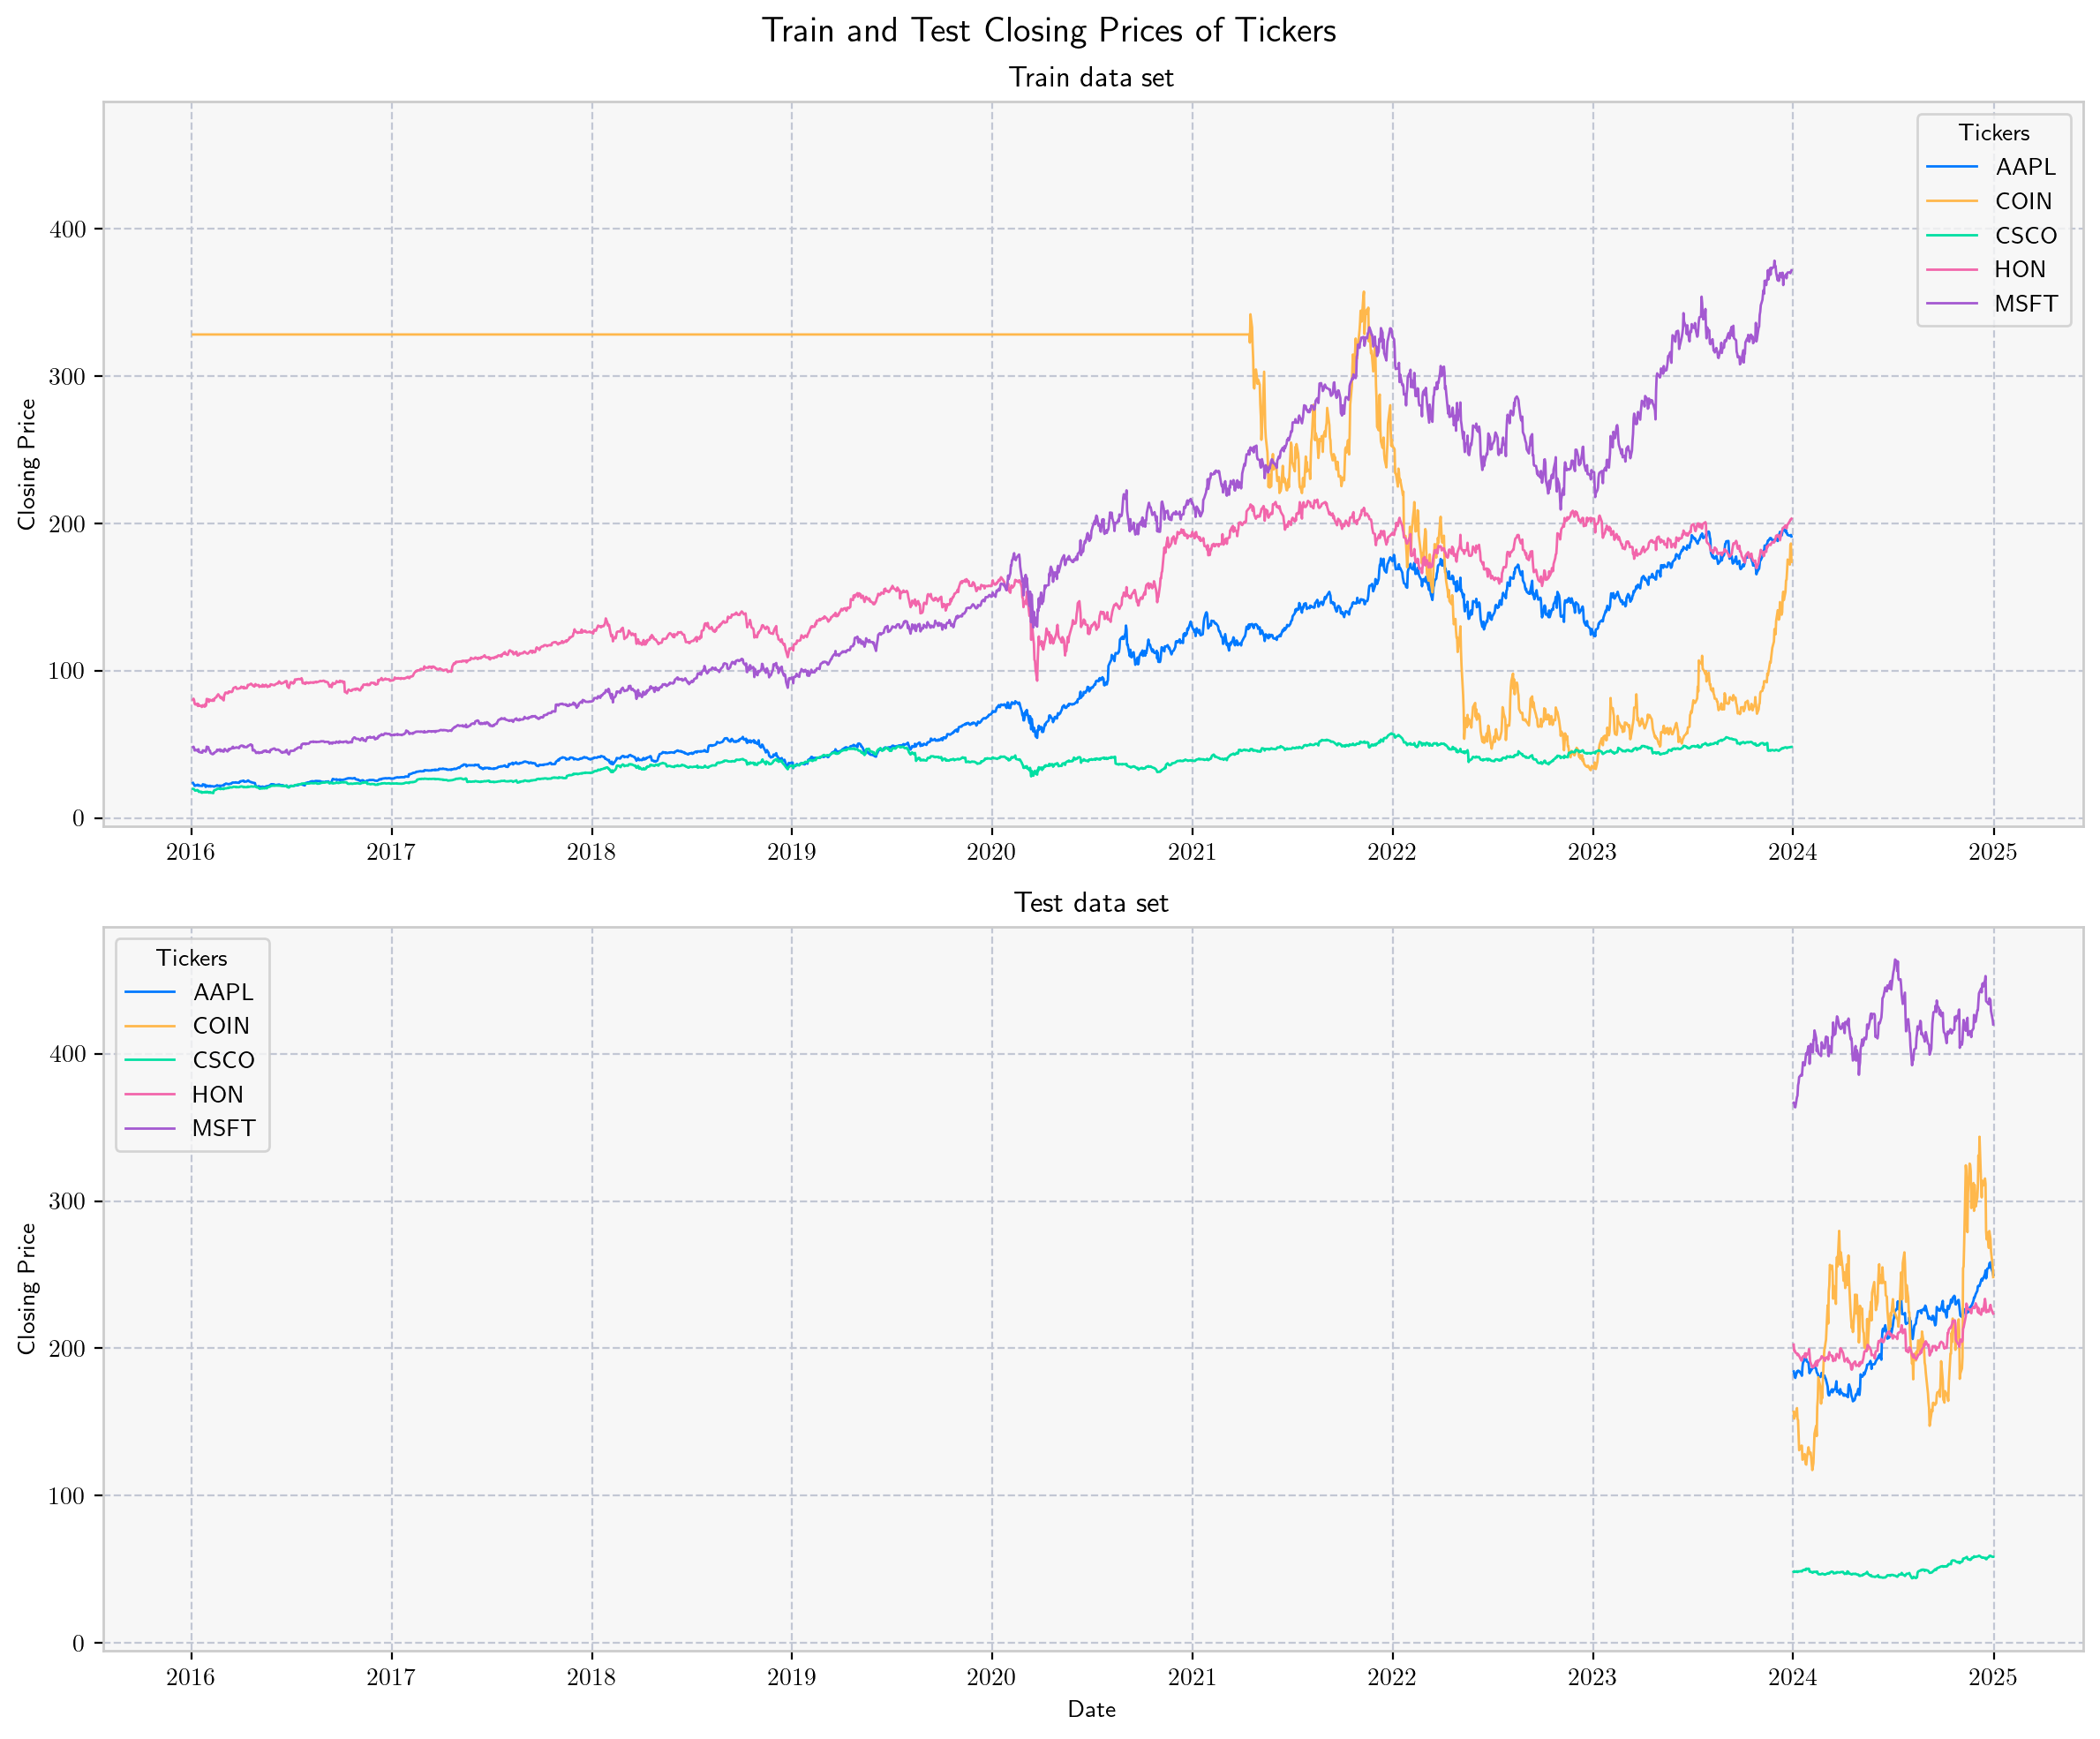

In [ ]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_train_test_close_prices(
    train_data, trade_data, "../" + config.PLOT_DIR, config.TEST_NAME
)

In [ ]:
stock_dimension = len(train_data.tic.unique())
state_space = len(config_indicators.TECHNICAL_INDICATORS)
env_kwargs = {
    "initial_amount": 1000000,
    "state_space": state_space,
    "stock_dimension": stock_dimension,
    "tech_indicator_list": config_indicators.TECHNICAL_INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-1,
}

env_train = PortfolioOptimisationEnv(train_data, **env_kwargs)

In [ ]:
env_train_, _ = env_train.get_sb_env()

{'n_steps': 10, 'ent_coef': 0.005, 'learning_rate': 0.0004}
Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 1429      |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -7.04     |
|    explained_variance | 0         |
|    learning_rate      | 0.0004    |
|    n_updates          | 99        |
|    policy_loss        | 7.92e+07  |
|    reward             | 2161603.2 |
|    reward_max         | 2161603.2 |
|    reward_mean        | 2119053.5 |
|    reward_min         | 2058387.8 |
|    std                | 0.989     |
|    value_loss         | 1.53e+14  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1470      |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_

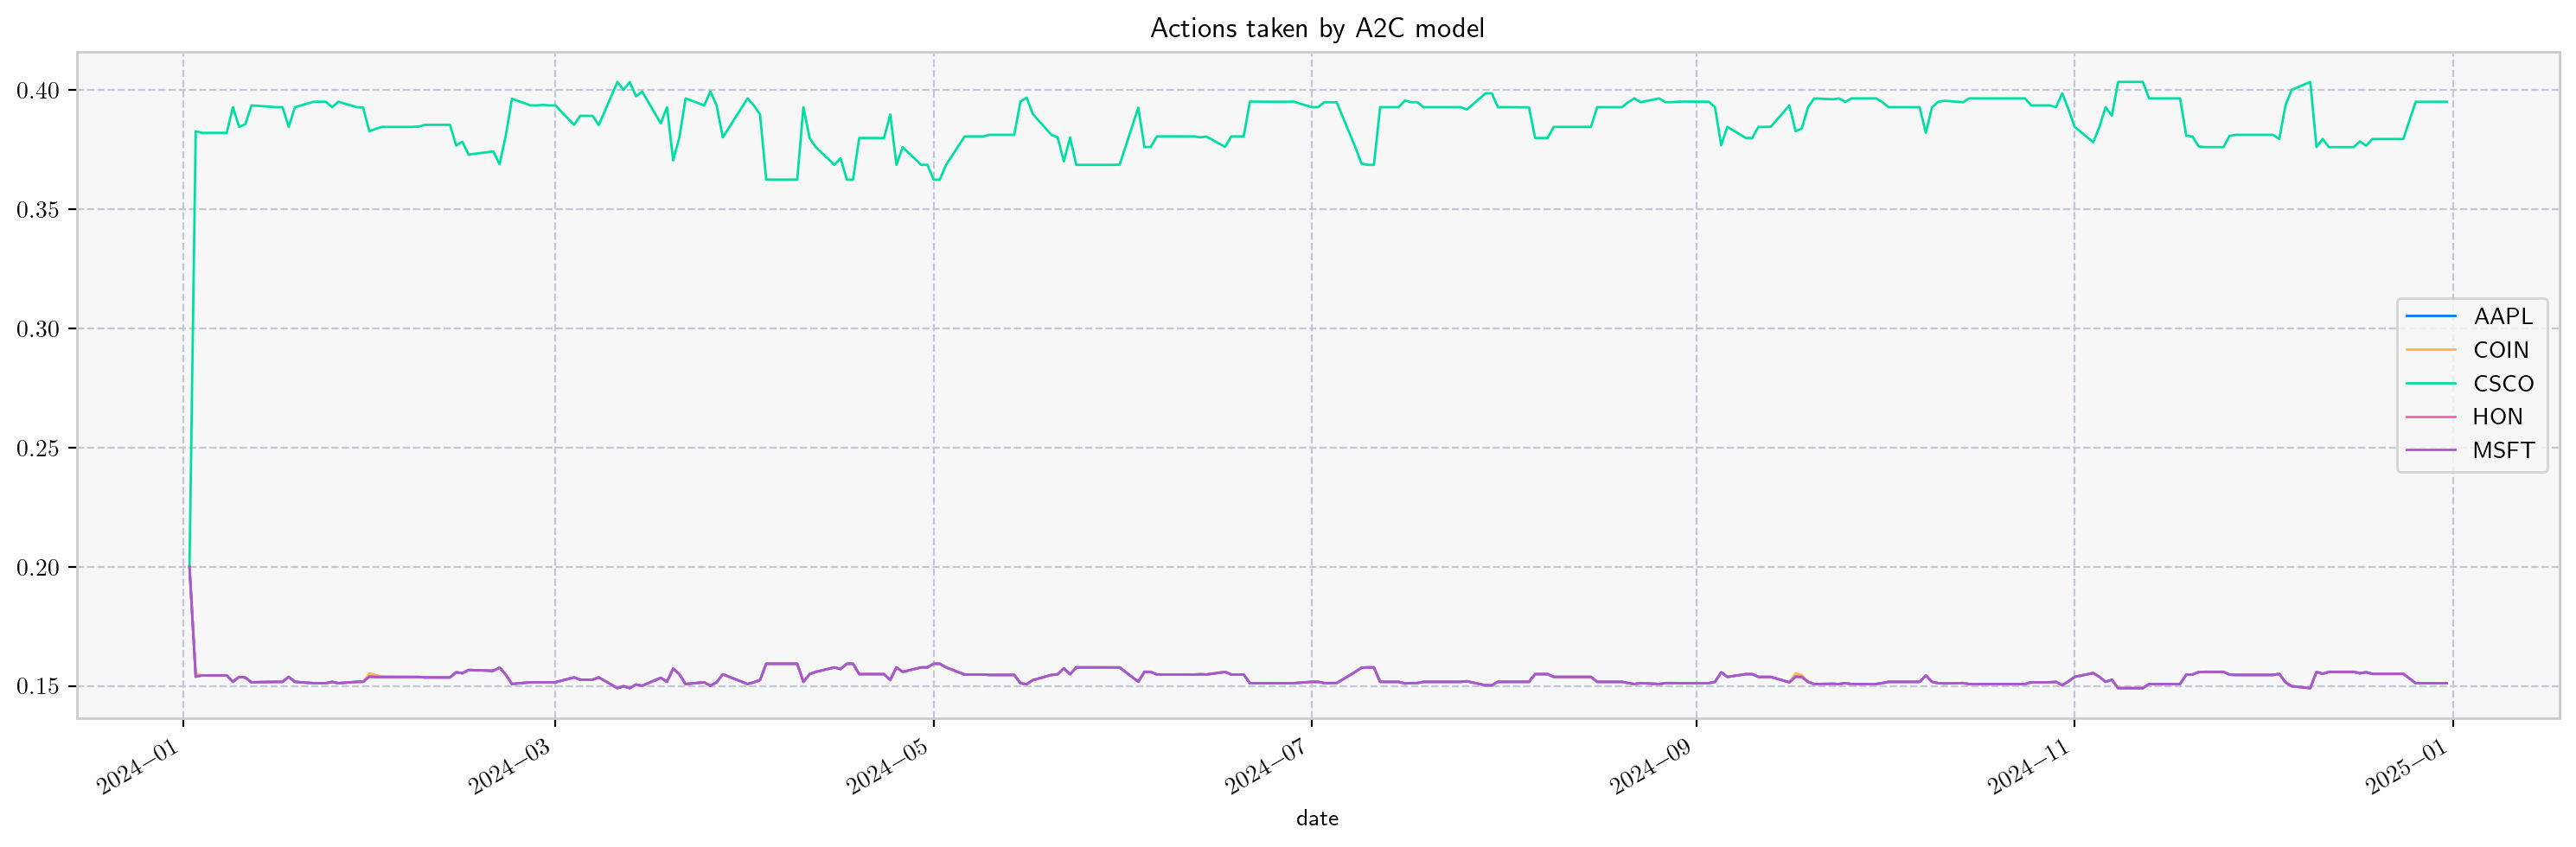

In [ ]:
agent = DRLAgent(env=env_train_)

A2C_PARAMS = {"n_steps": 10, "ent_coef": 0.005, "learning_rate": 0.0004}

model_a2c = agent.get_model("a2c", model_kwargs=A2C_PARAMS)

trained_a2c = agent.train_model(
    model=model_a2c,
    tb_log_name="a2c",
    total_timesteps=40000,
)

e_trade_gym = PortfolioOptimisationEnv(trade_data, **env_kwargs)
df_daily_return_a2c, df_actions_a2c = agent.DRL_prediction(
    model=trained_a2c, environment=e_trade_gym
)
df_actions_a2c.plot(
    title=f"Actions taken by A2C model",
    figsize=(15, 5),
)
plt.show()

In [ ]:
df_actions_a2c

,AAPL,COIN,CSCO,HON,MSFT
date,,,,,
2024-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2024-01-03,0.153976,0.155347,0.382725,0.153976,0.153976
2024-01-04,0.154480,0.154480,0.382082,0.154480,0.154480
2024-01-05,0.154480,0.154480,0.382082,0.154480,0.154480
2024-01-08,0.154480,0.154480,0.382082,0.154480,0.154480
...,...,...,...,...,...
2024-12-24,0.155129,0.155129,0.379485,0.155129,0.155129
2024-12-26,0.151226,0.151226,0.395098,0.151226,0.151226
2024-12-27,0.151223,0.151223,0.395107,0.151223,0.151223
